<a href="https://colab.research.google.com/github/TejasSnaik/VISUALIZATION-OF-DECISION-TREE-ALGORITHM/blob/master/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO EXPLORE DECISION TREE ALGORITHM FOR IRIS DATASET** 

**IMPORTING ALL THE REQUIRED LIBRARIES**



In [65]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

**IMPORTING THE IRIS DATASET AND CREATING A DATAFRAME USING PANDAS**

In [66]:
iris = load_iris() 
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**CONVERTING THE DATATYPE OF ALL THE FEATURES OF DATASET**

In [67]:
df1=df.astype(float)
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
df1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
df1.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [70]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [71]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [73]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [74]:
iris['target_names'],iris['target']

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

**DIVIDING THE DATASET INTO TWO VARIABLES**

In [75]:
X=iris['data']
y=iris['target']

**SPLITTING THE DATASET FOR TRAINING AND TESTING USING train_test_split**

In [76]:
X_train,y_train,X_test,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=33)

In [77]:
print(iris['data'].shape)

(150, 4)


In [78]:
print(iris['target'].shape)

(150,)


In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**IMPORTING THE DECISION TREE CLASSIFIER FROM SCIKIT LEARN AND CREATING AN OBJECT TO TRAIN THE DATA**


In [80]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(df1,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**FOR VISUALIZATION OF THE DATA WE NEED TO INSTALL graphviz,dtreeviz,pydotplus**

In [81]:
!pip install pydotplus
!pip install graphviz 
!pip install dtreeviz

**VISUALIZATION OF DECISION TREE USING plot_tree**

plot_tree is used for visualization of classification problem and is easy to implement which does not require exporting of tree using graphviz and converting to DOT format

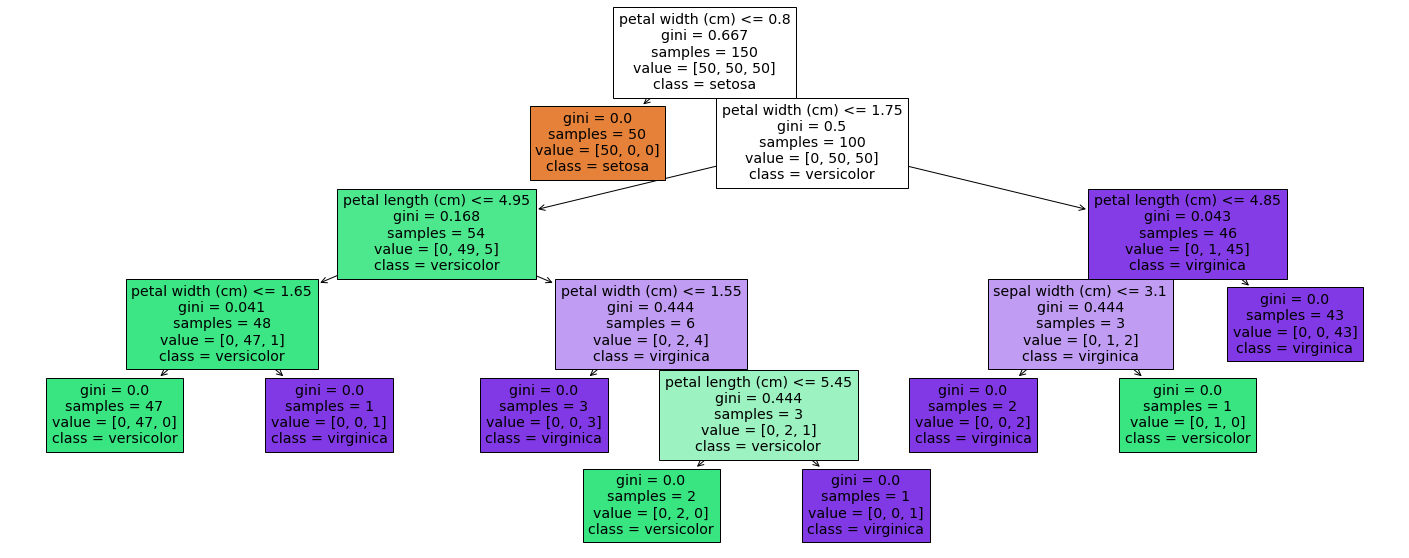

In [82]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
_=plot_tree(tree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)

**VISUALIZATION OF DECISION TREE USING graphviz**

Here we need to convert it to DOT format using export_graphviz and then visualize the tree 




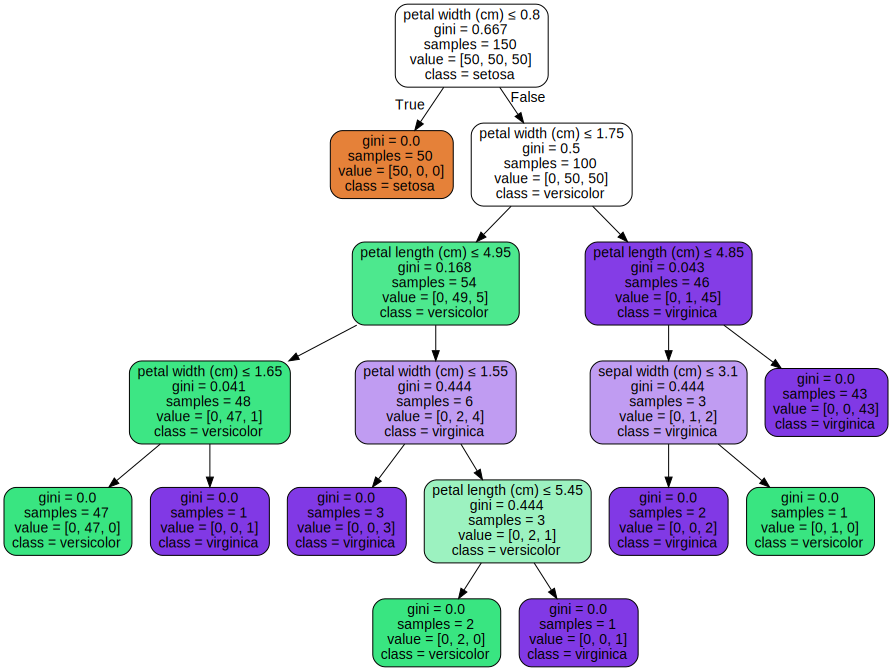

In [83]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
import graphviz
dot_data=export_graphviz(tree,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data,format='png')
graph

**IMPORTING SHADOW TREE FROM SCIKIT LEARN**


In [84]:
from  dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from  dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz import trees

In [85]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
import sys
import os
#add library module to pythonpath
sys.path.append(f"{os.getcwd()}/../")

**INITIALIZE SHADOW TREE**

In [87]:
sk_dtree=ShadowSKDTree(tree,X,y,iris['feature_names'],iris['target'],class_names=['setosa', 'versicolor', 'virginica'])

**viz_leaf_smaples**

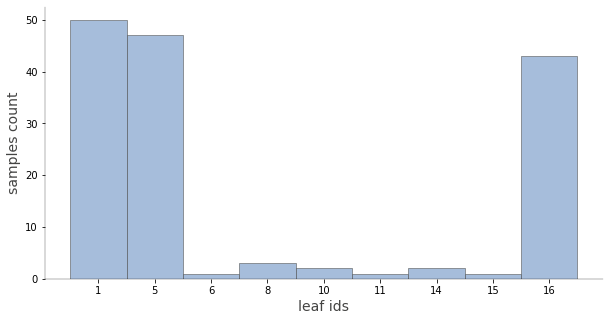

In [88]:
trees.viz_leaf_samples(tree,X,iris['feature_names'])

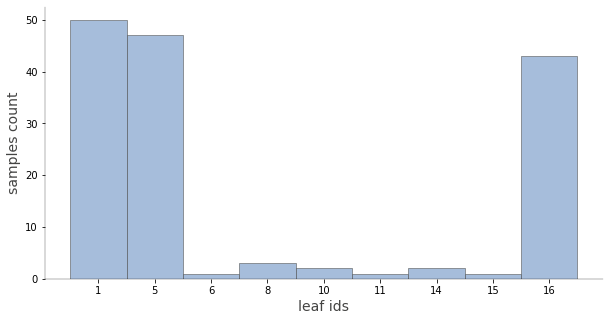

In [89]:
trees.viz_leaf_samples(sk_dtree)

**VISUALIZATION USING dtreeviz**

Unlike graphviz where we need to export the tree to DOT format using export_graphviz ,in dtree visualization there is no compulsion to convert the tree to DOT format.We can directly visualize by importing dtreeviz and assigning the values 

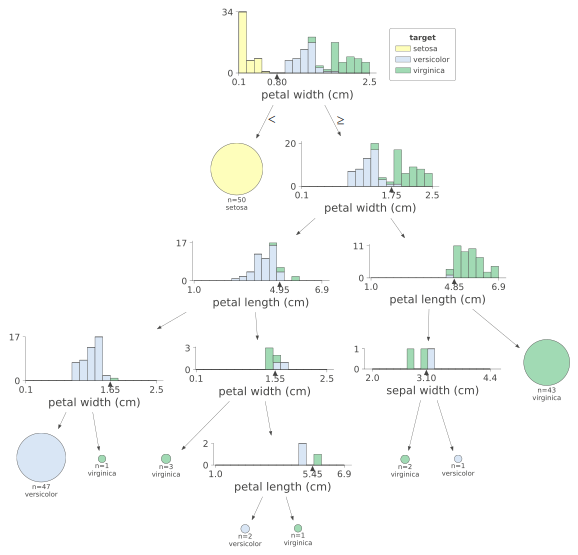

In [90]:

trees.dtreeviz(tree,X,y,iris.feature_names,target_name='target',class_names=['setosa', 'versicolor', 'virginica'],
               histtype ='barstacked',label_fontsize=15,ticks_fontsize=12,
               max_X_features_TD=15,max_X_features_LR=15)